<a href="https://colab.research.google.com/github/Ucchwas/Handwritten-Number-Classification/blob/main/handwriting_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

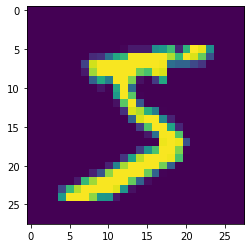

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255
x_train.shape

(60000, 28, 28)

In [ ]:
x_train_flatten = x_train.reshape(-1, 28*28)
x_test_flatten = x_test.reshape(-1,28*28)

x_train_flatten.shape

(60000, 784)

*Using ANN*

In [ ]:
ann = models.Sequential([
      layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
ann.fit(x_train_flatten,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4708 - accuracy: 0.8778
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3041 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2833 - accuracy: 0.9211
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2617 - accuracy: 0.9270
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2582 - accuracy: 0.9284
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2557 - accuracy: 0.9291
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2533 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.250

In [ ]:
ann.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2673 - accuracy: 0.9259


[0.26726803183555603, 0.9258999824523926]

In [ ]:
y_pred = ann.predict(x_test_flatten)
y_pred[0]

array([8.42422247e-03, 8.62315197e-09, 1.10921860e-02, 9.70542729e-01,
       1.72060728e-03, 1.13129854e-01, 4.42914505e-08, 9.99900460e-01,
       8.54210556e-02, 6.29187465e-01], dtype=float32)

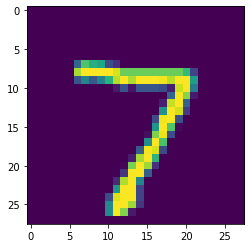

In [ ]:
plt.imshow(x_test[0])

In [ ]:
np.argmax(y_pred[0])

7

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1108,    3,    2,    0,    1,    5,    2,   14,    0],
       [   6,    8,  927,   15,    9,    4,   13,   13,   35,    2],
       [   4,    0,   19,  919,    0,   20,    4,   13,   25,    6],
       [   1,    1,    3,    2,  915,    0,   11,    6,   10,   33],
       [  11,    2,    3,   42,    9,  760,   18,    9,   31,    7],
       [  12,    3,    7,    1,    7,    9,  916,    2,    1,    0],
       [   1,    6,   21,    5,    6,    0,    0,  966,    2,   21],
       [   9,    6,    6,   19,    8,   20,   13,   12,  874,    7],
       [  11,    7,    1,    9,   27,    5,    0,   33,    6,  910]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

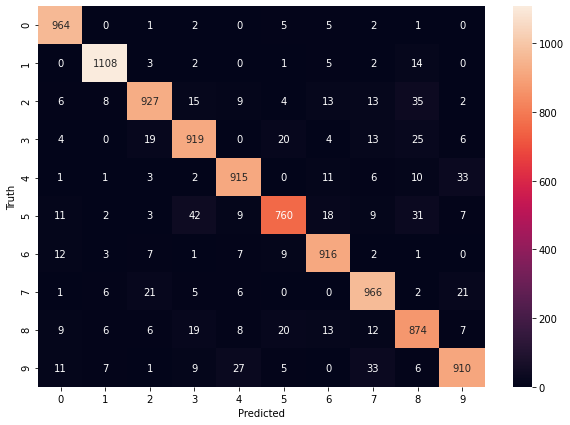

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

*DEEP Layers*

In [ ]:
ann = models.Sequential([
      layers.Dense(100,input_shape=(784,),activation='relu'),
      layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
ann.fit(x_train_flatten,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.9246
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1206 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0831 - accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0635 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0496 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0326 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0267 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0219 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [ ]:
ann.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0806 - accuracy: 0.9783


[0.08062534779310226, 0.9782999753952026]

In [ ]:
y_pred = ann.predict(x_test_flatten)
y_pred[0]

array([3.0034781e-04, 5.1467655e-06, 4.5948327e-03, 8.8853633e-01,
       1.5438985e-08, 5.5064261e-03, 1.1279158e-10, 9.9999797e-01,
       1.6103178e-02, 7.8916991e-01], dtype=float32)

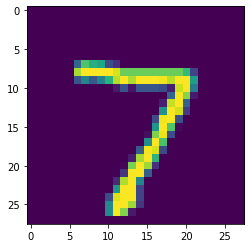

In [ ]:
plt.imshow(x_test[0])

Text(69.0, 0.5, 'Truth')

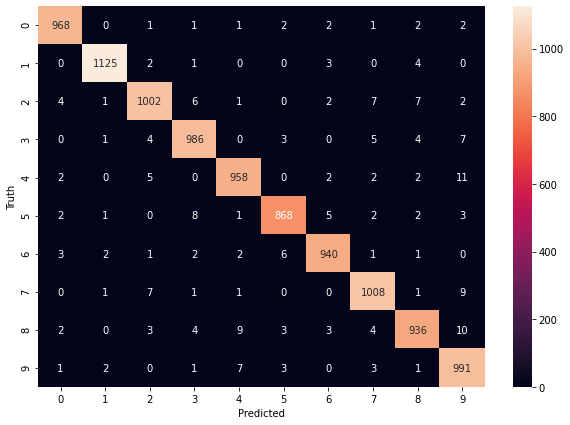

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

*Using CNN*

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
cnn = models.Sequential([
      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
      layers.MaxPooling2D(2,2),

      layers.Flatten(),
      layers.Dense(100,activation='relu'),
      layers.Dense(10,activation='sigmoid')
])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1553 - accuracy: 0.9542
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0507 - accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0337 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0224 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0154 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0118 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0083 - accuracy: 0.9975
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0068 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0060 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 36s 19m

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0546 - accuracy: 0.9869


[0.054641418159008026, 0.9868999719619751]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[0]

array([1.83269331e-05, 5.98852456e-01, 1.09285116e-01, 9.55960751e-02,
       2.22367913e-01, 9.68730455e-05, 5.78894834e-08, 1.00000000e+00,
       1.98008765e-05, 4.31334674e-02], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Text(69.0, 0.5, 'Truth')

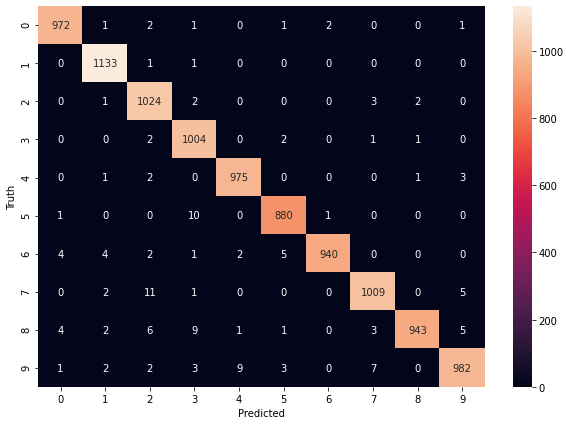

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')